# K-means Clustering

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank-full.csv")

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### as it is Europian bank data absolute minimum age is to be 17 there.

In [8]:
# domain experience is the high part of unsupervised learning.so you do some
# research to have some domain knowledge or contact the doamin expert

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

## Continuous Feature Analysis

In [10]:
sns.set_style('whitegrid')
import seaborn as sns

<AxesSubplot:xlabel='age', ylabel='Count'>

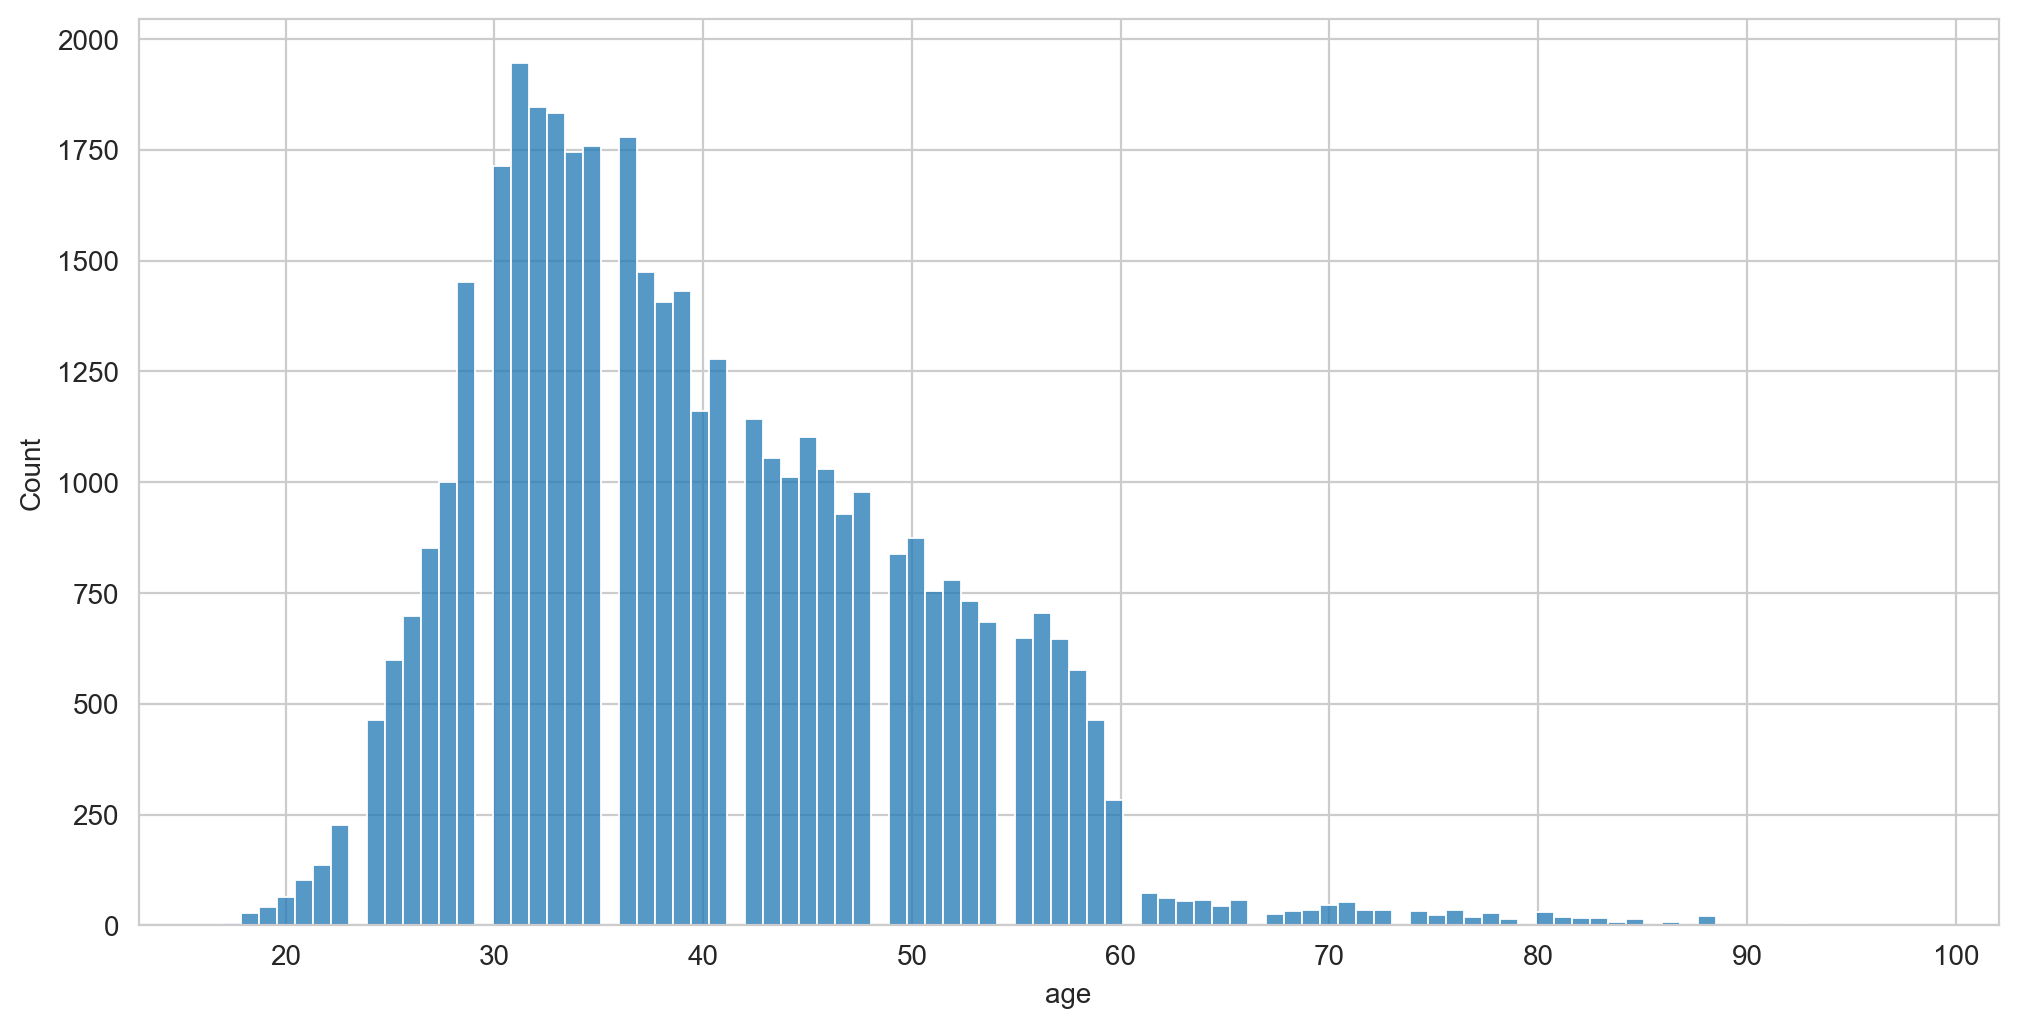

In [11]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age')

In [12]:
# most peoples are between ages 30 to 40 

<AxesSubplot:xlabel='age', ylabel='Count'>

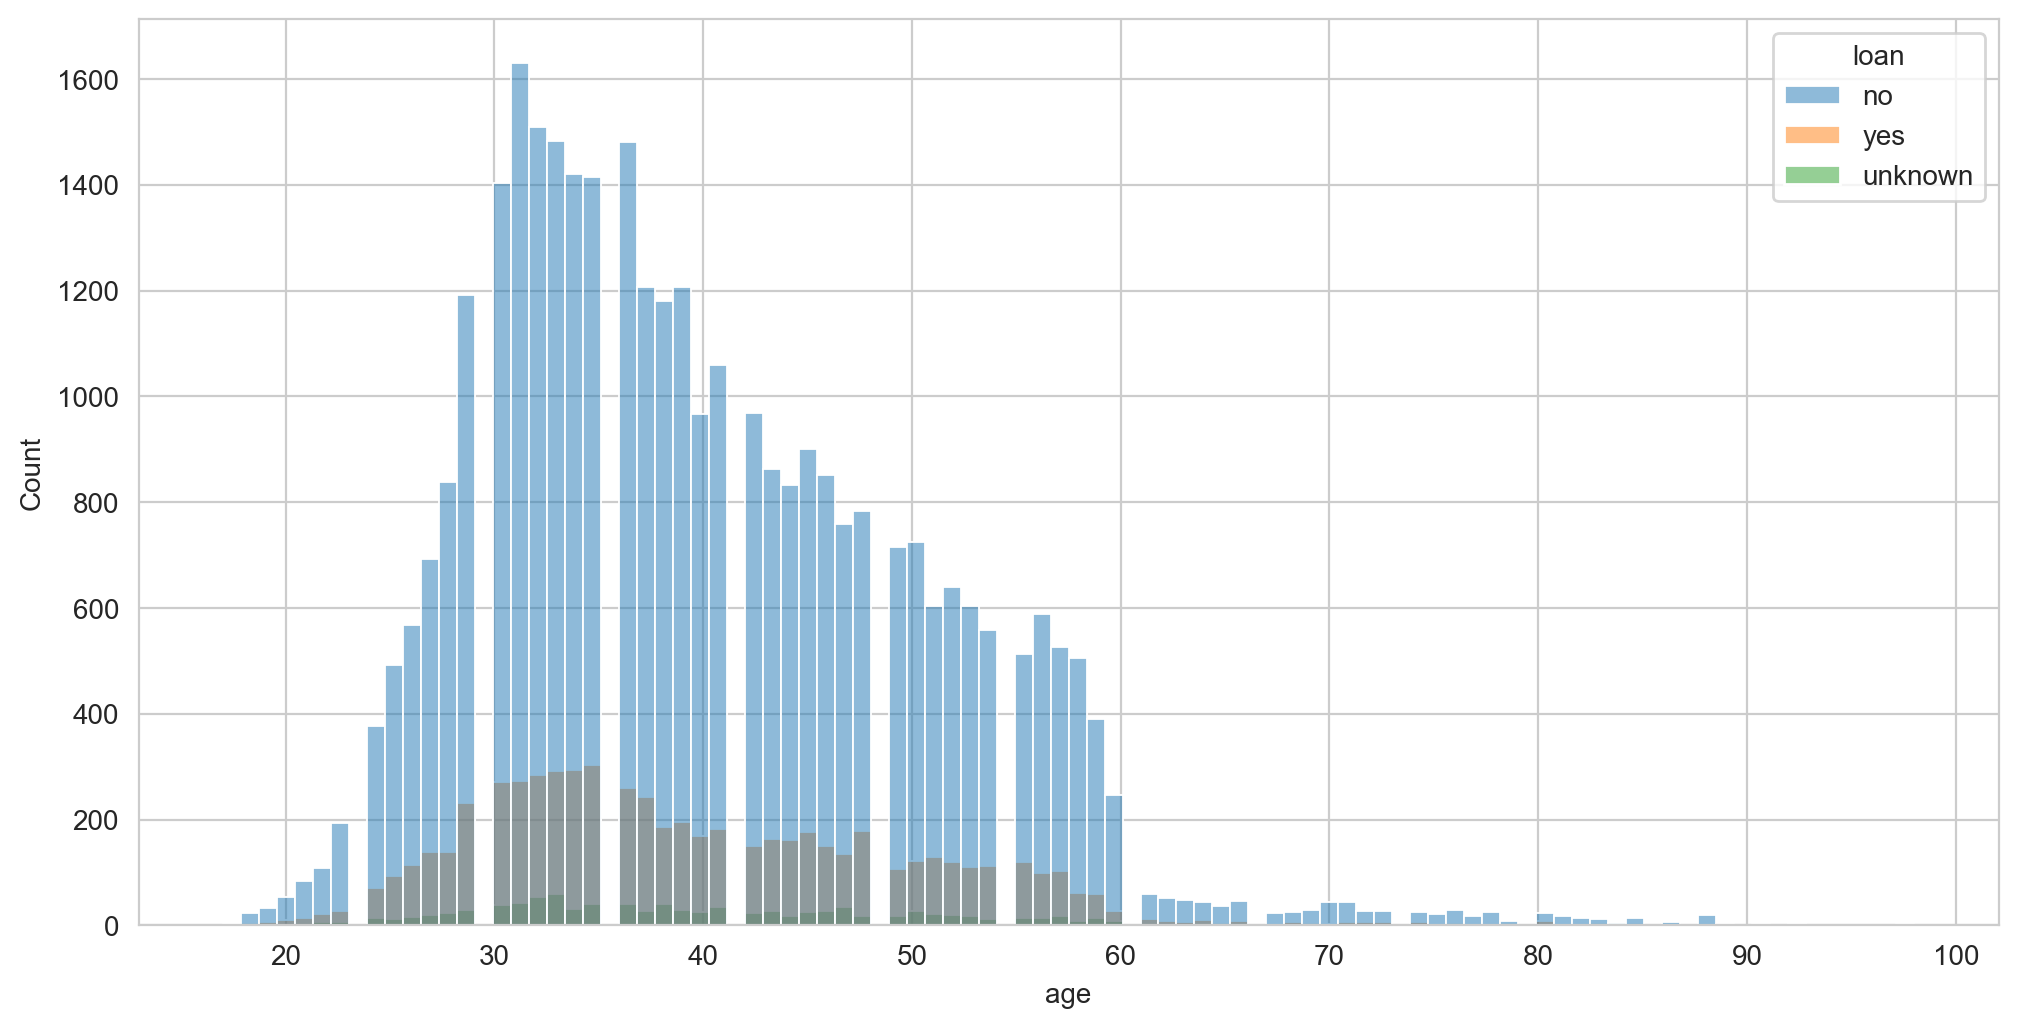

In [13]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='age',hue='loan')

In [14]:
# 3 clusters 
#1.peoples that currently dont have a loan (Blue color)
#2.peoples have the loan(Orange color)
#3.unknown (Green)
#majority of people dont have a loan

In [15]:
#pdays are no. of days passed by after the client was last contacted from 
#some sort of previous compaign

<AxesSubplot:xlabel='pdays', ylabel='Count'>

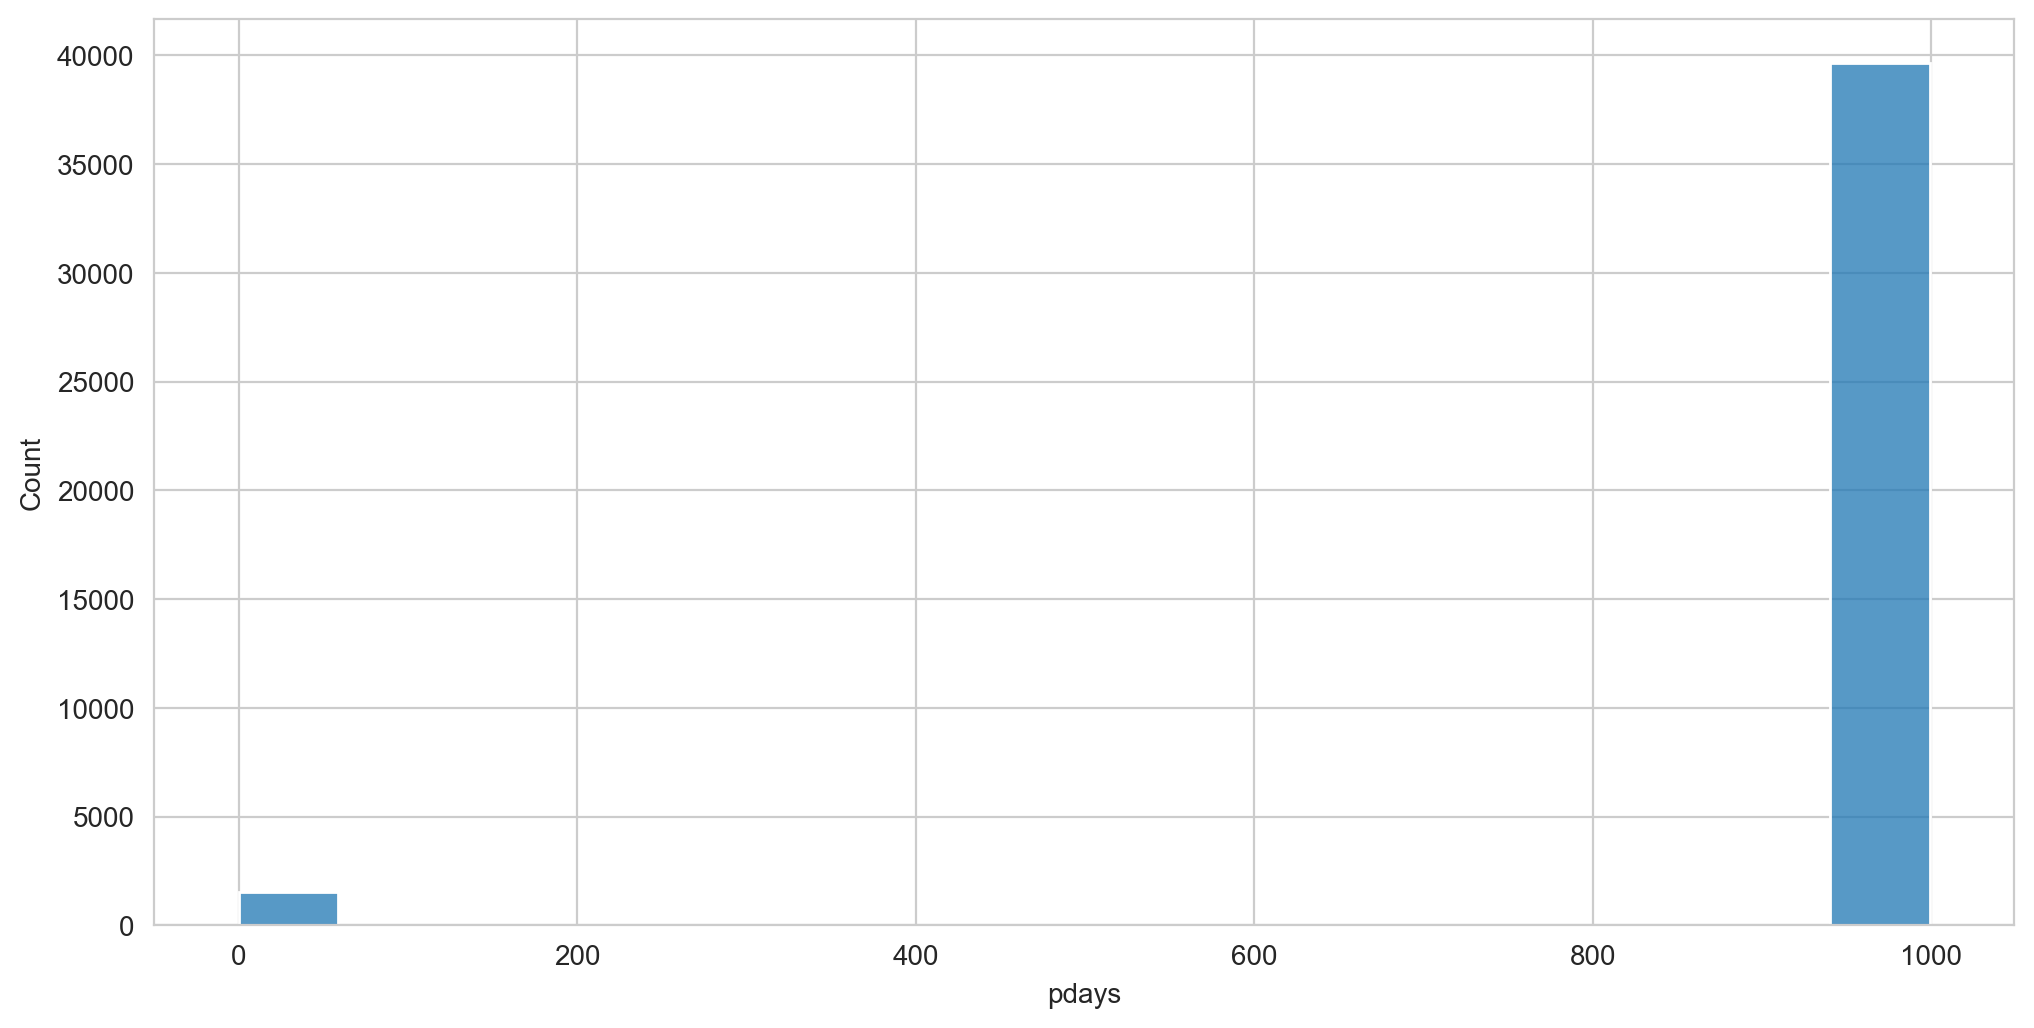

In [16]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='pdays')

In [17]:
#999 are the people that never been contacted for any marketing compaign
# In order to get some insight we shrink X limits or drop everyone at 999

<AxesSubplot:xlabel='pdays', ylabel='Count'>

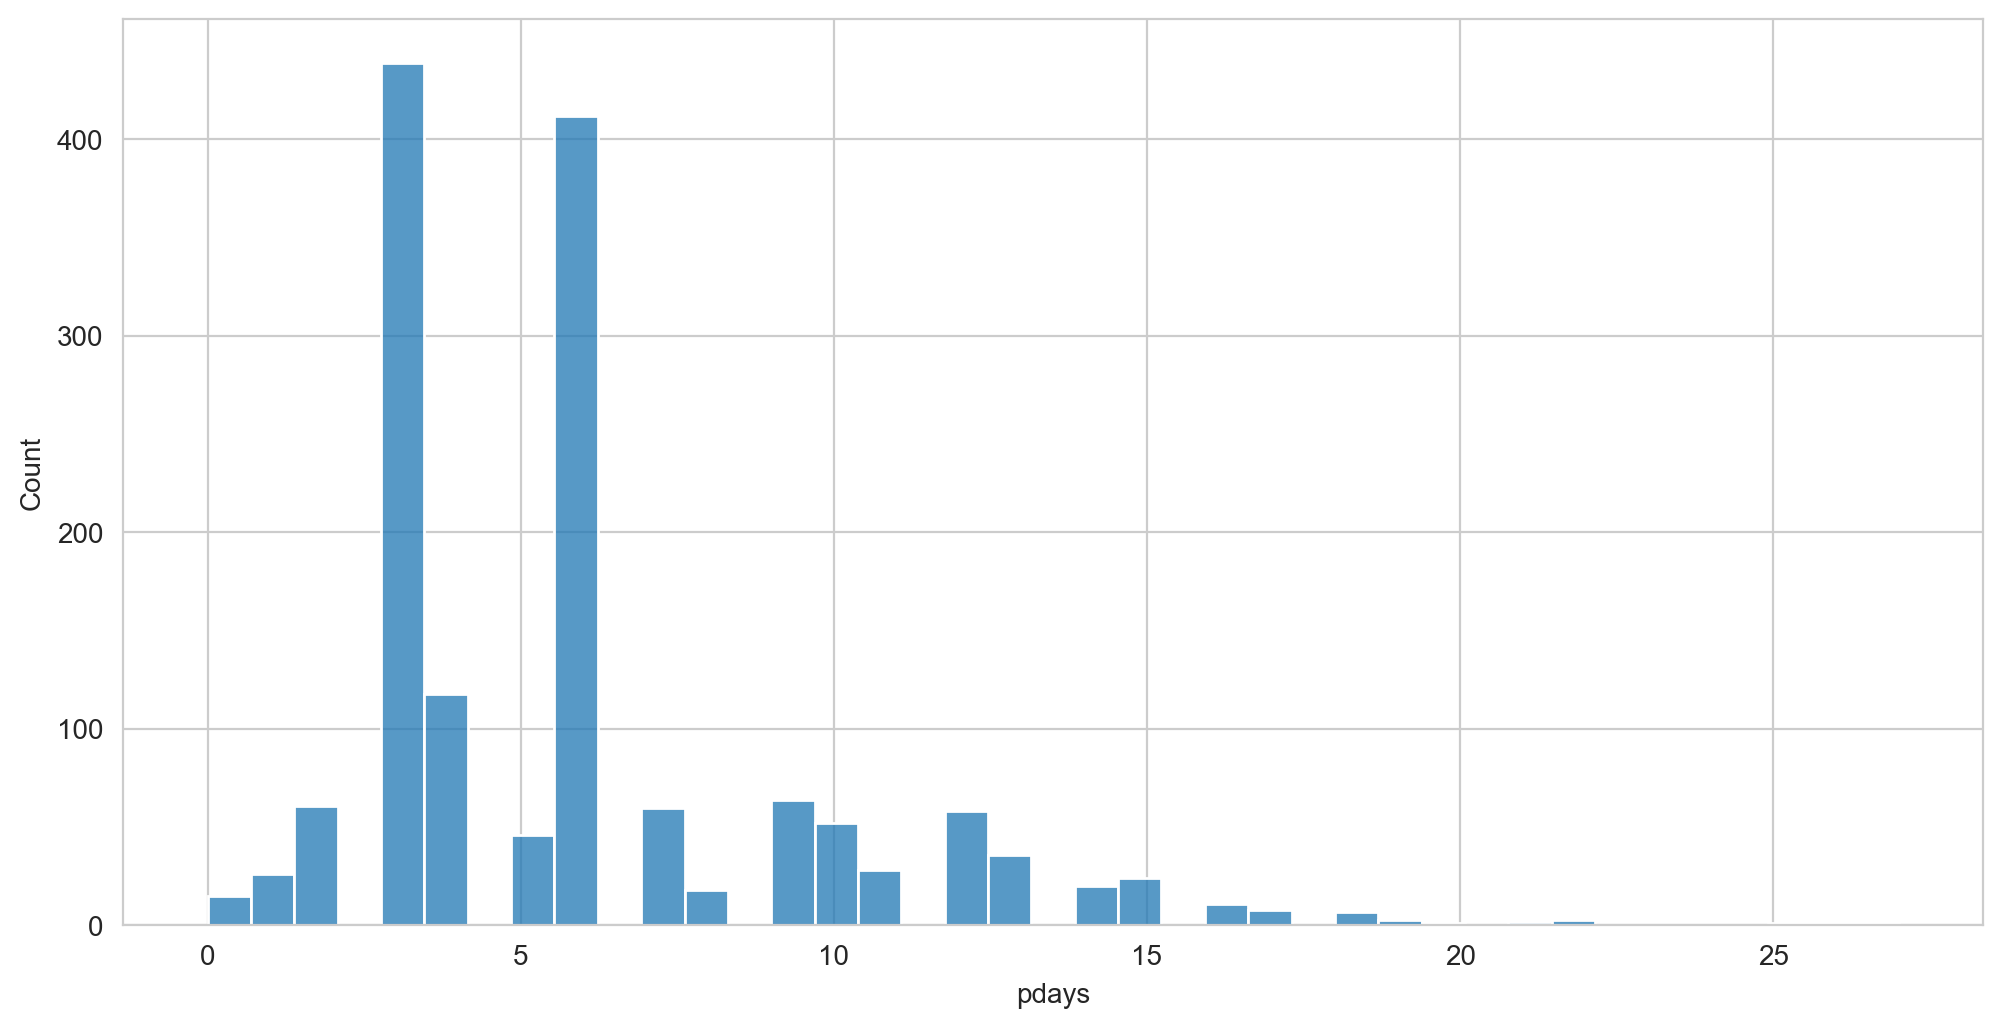

In [18]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df[df['pdays']!=999],x='pdays')

In [19]:
#Based of previous compaigns most people only had may be somehow btn 3 and 10days
# since they have been contacted

In [20]:
df['duration'].unique()

array([ 261,  149,  226, ..., 1246, 1556, 1868], dtype=int64)

In [21]:
df['duration'].nunique()

1544

In [22]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

<AxesSubplot:xlabel='contact', ylabel='count'>

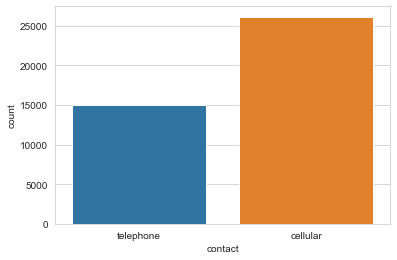

In [23]:
sns.countplot(data=df,x='contact')

### Contact duration - contact with customer made, how long did call last?

<AxesSubplot:xlabel='duration', ylabel='Count'>

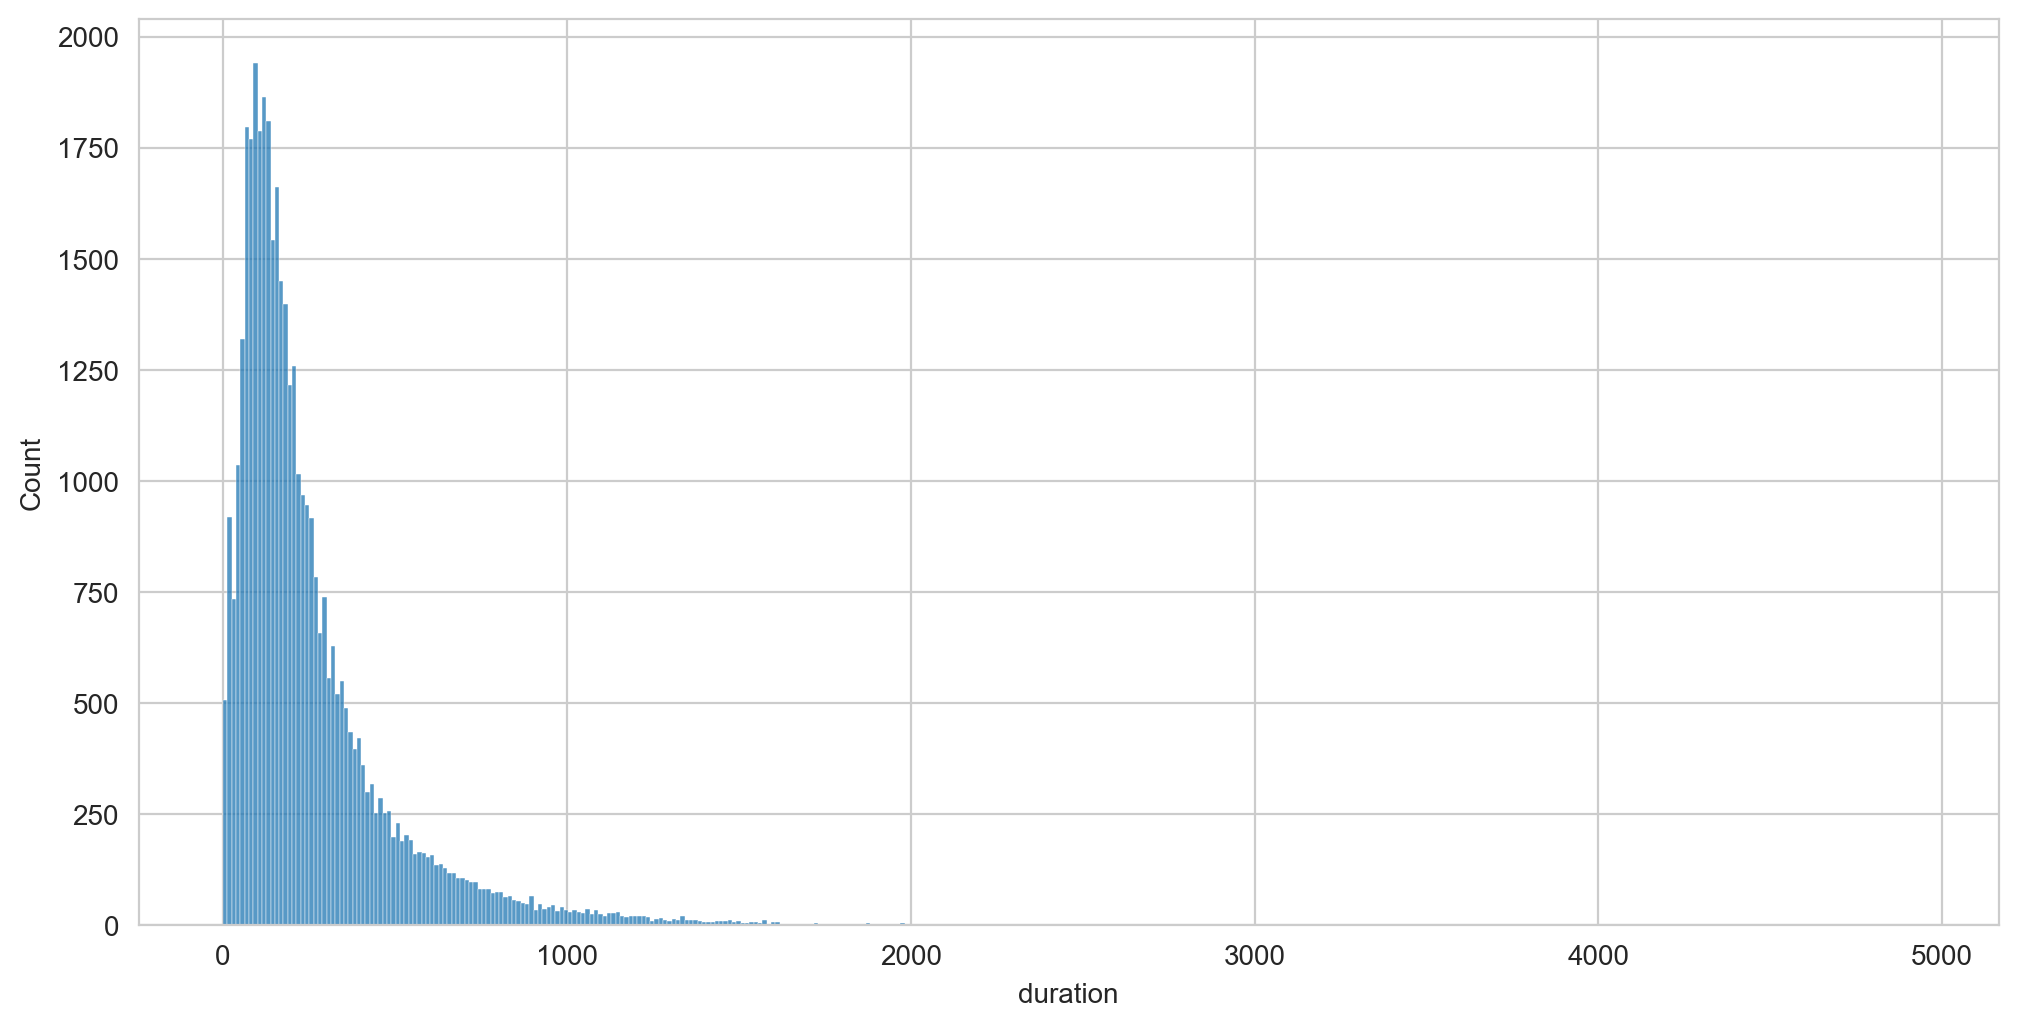

In [24]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration')

In [25]:
#Few cases had super long duration time over 2000 sec
#majority of people had a call betn 0 and 10 min mark

<AxesSubplot:xlabel='duration', ylabel='Count'>

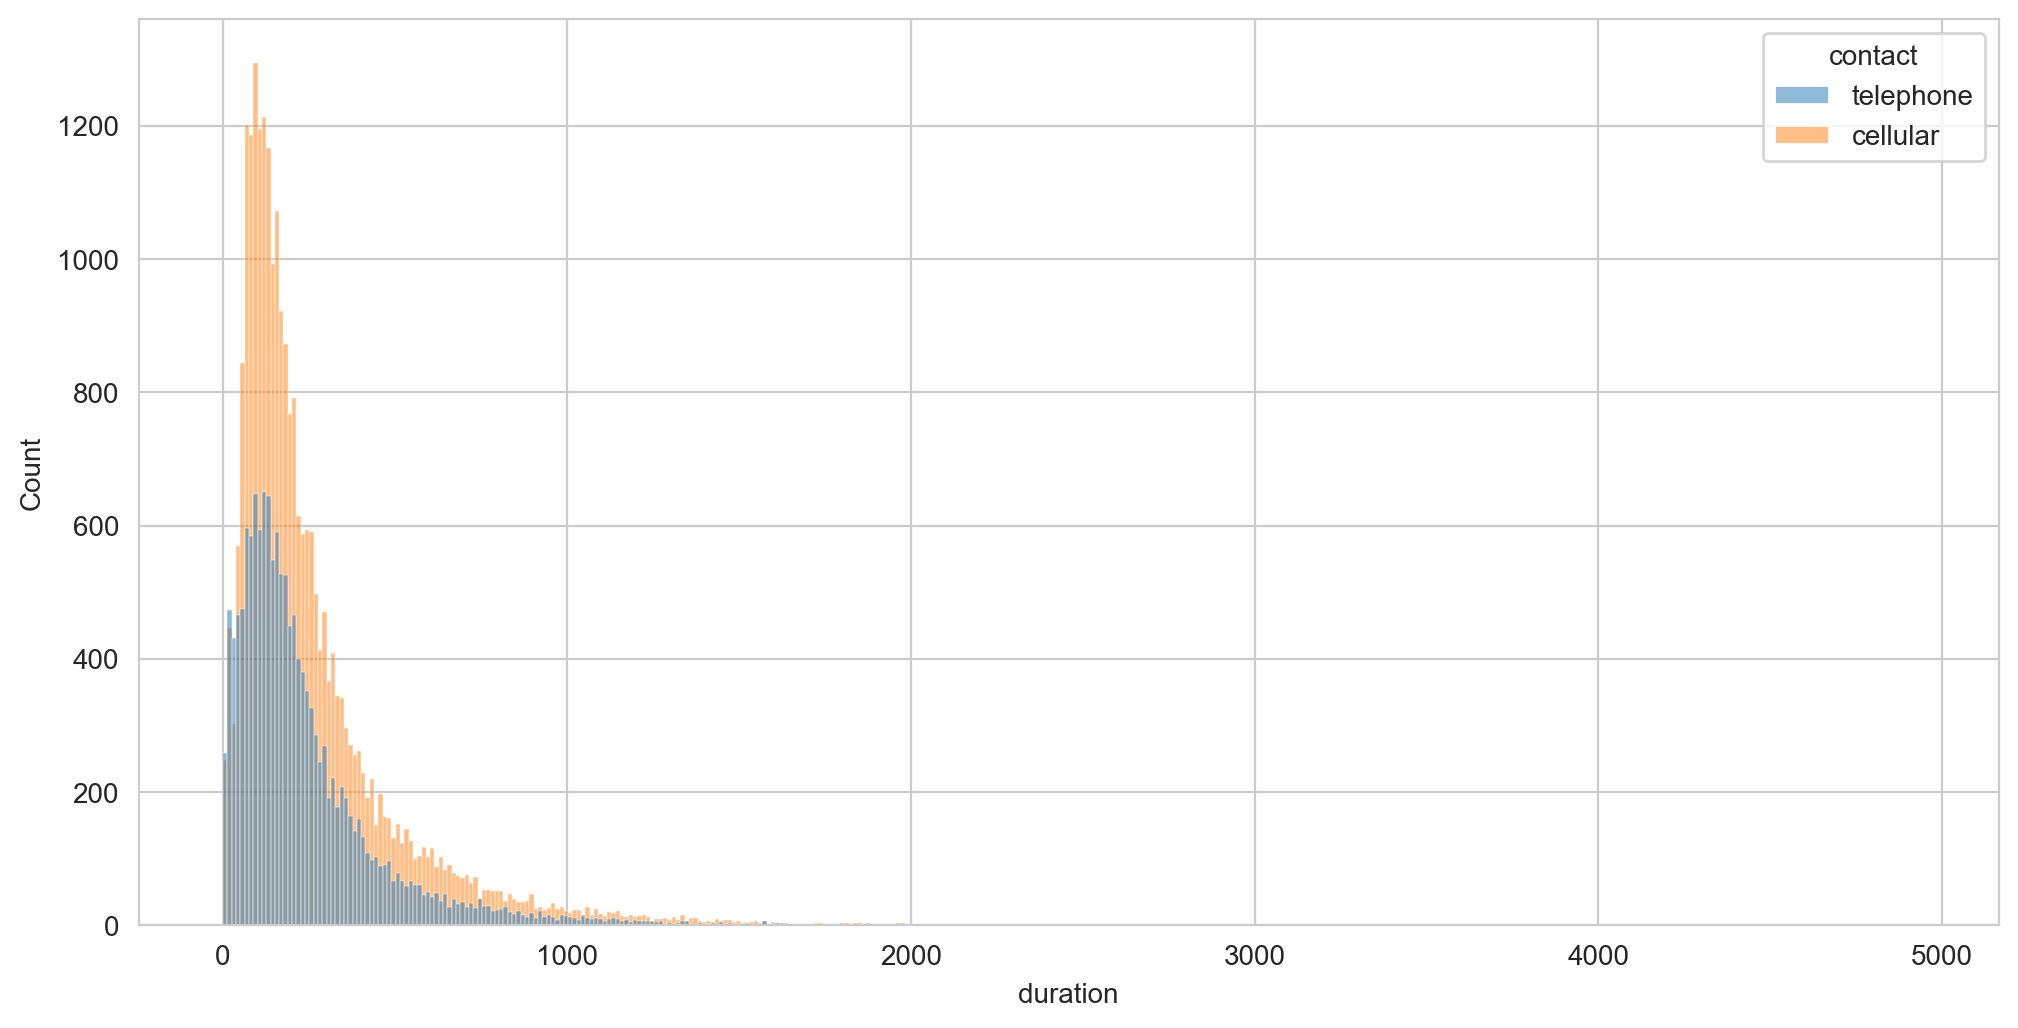

In [26]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')

In [27]:
#the distribution is very much almost same only the cellular had a higher 
#count than telephone but behaviour of the distribution is extremely similar
# we see the further by manually editing x limit

(0.0, 2000.0)

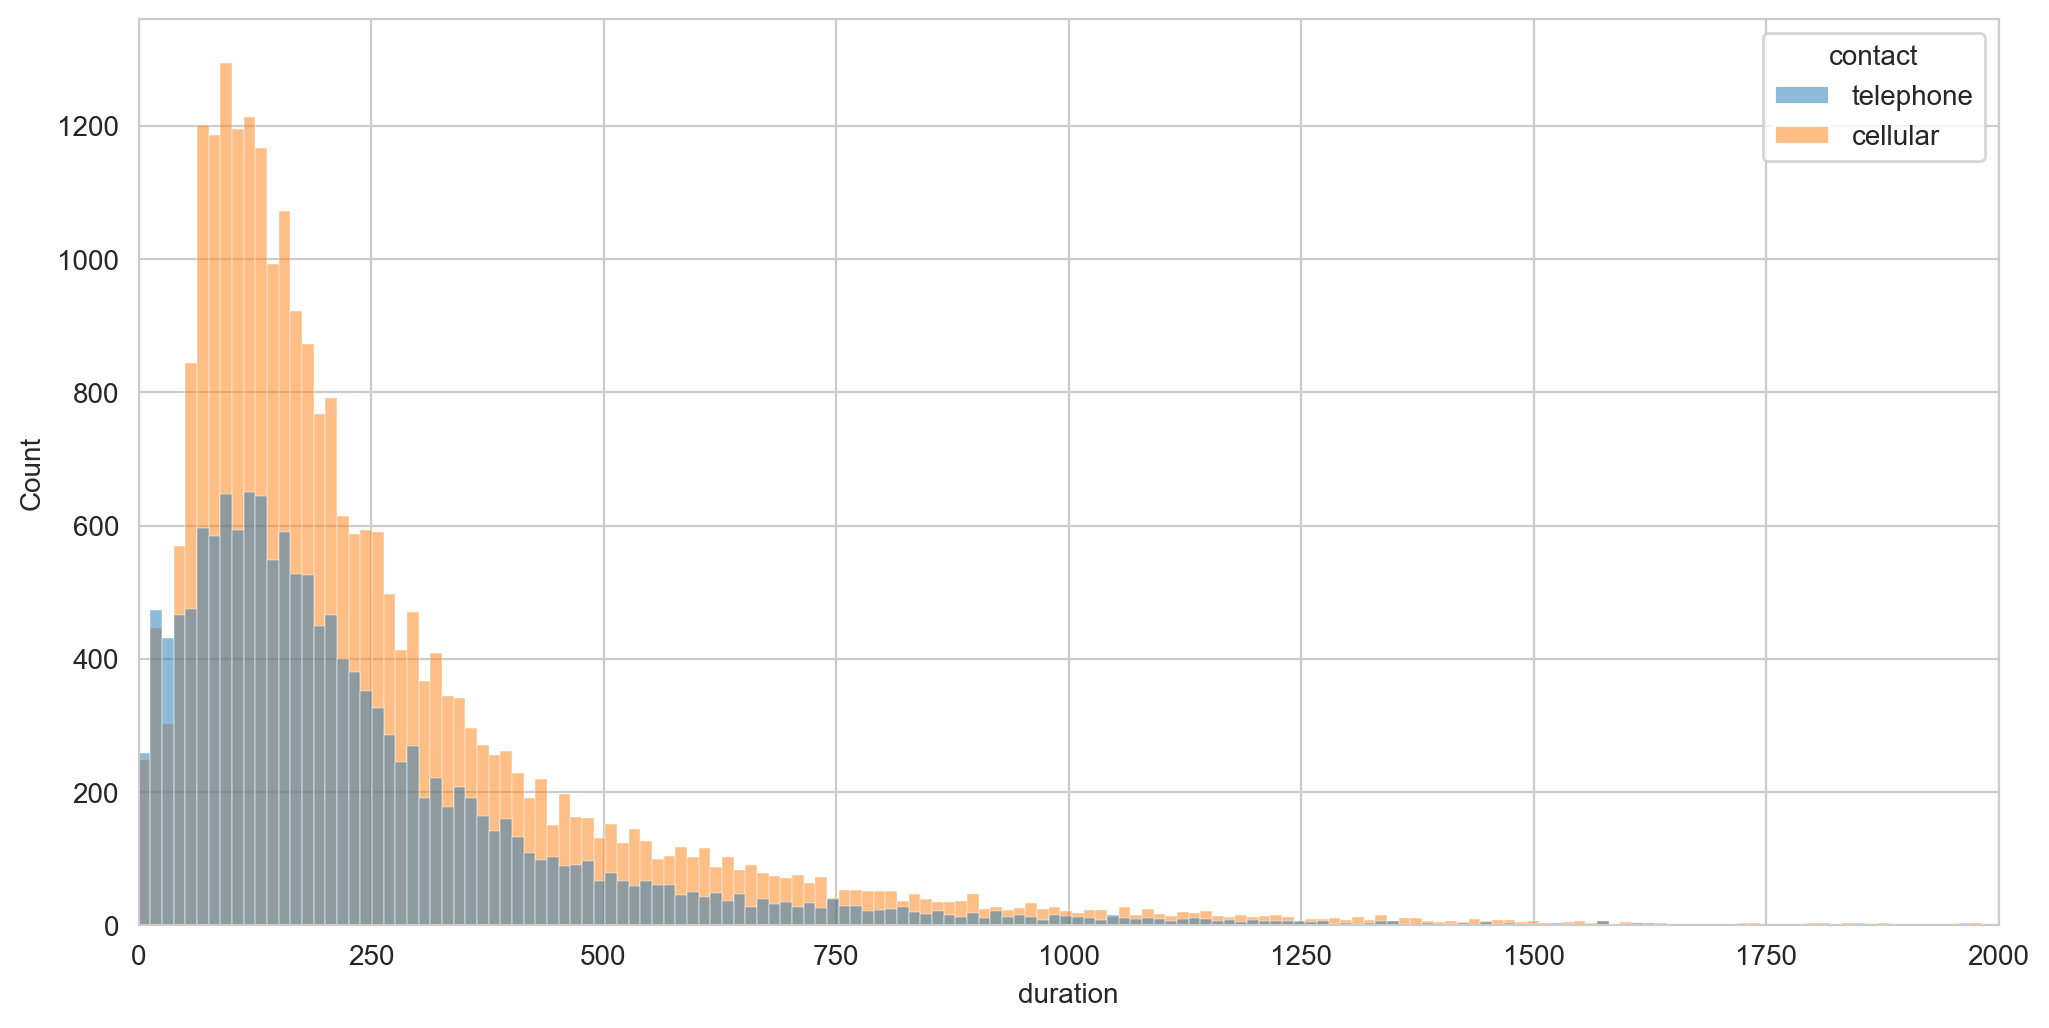

In [28]:
plt.figure(figsize=(12,6),dpi=200)
sns.histplot(data=df,x='duration',hue='contact')
plt.xlim(0,2000)

In [29]:
# Actual insight from this is that most of the people giving their cellphone rather 
#than landline telephone

<AxesSubplot:xlabel='contact', ylabel='count'>

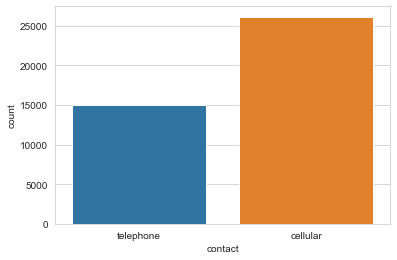

In [30]:
sns.countplot(data=df,x='contact')
#whether you conatcting someone on cellphone or landline avg call time doesnt 
#make a difference

In [31]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object')

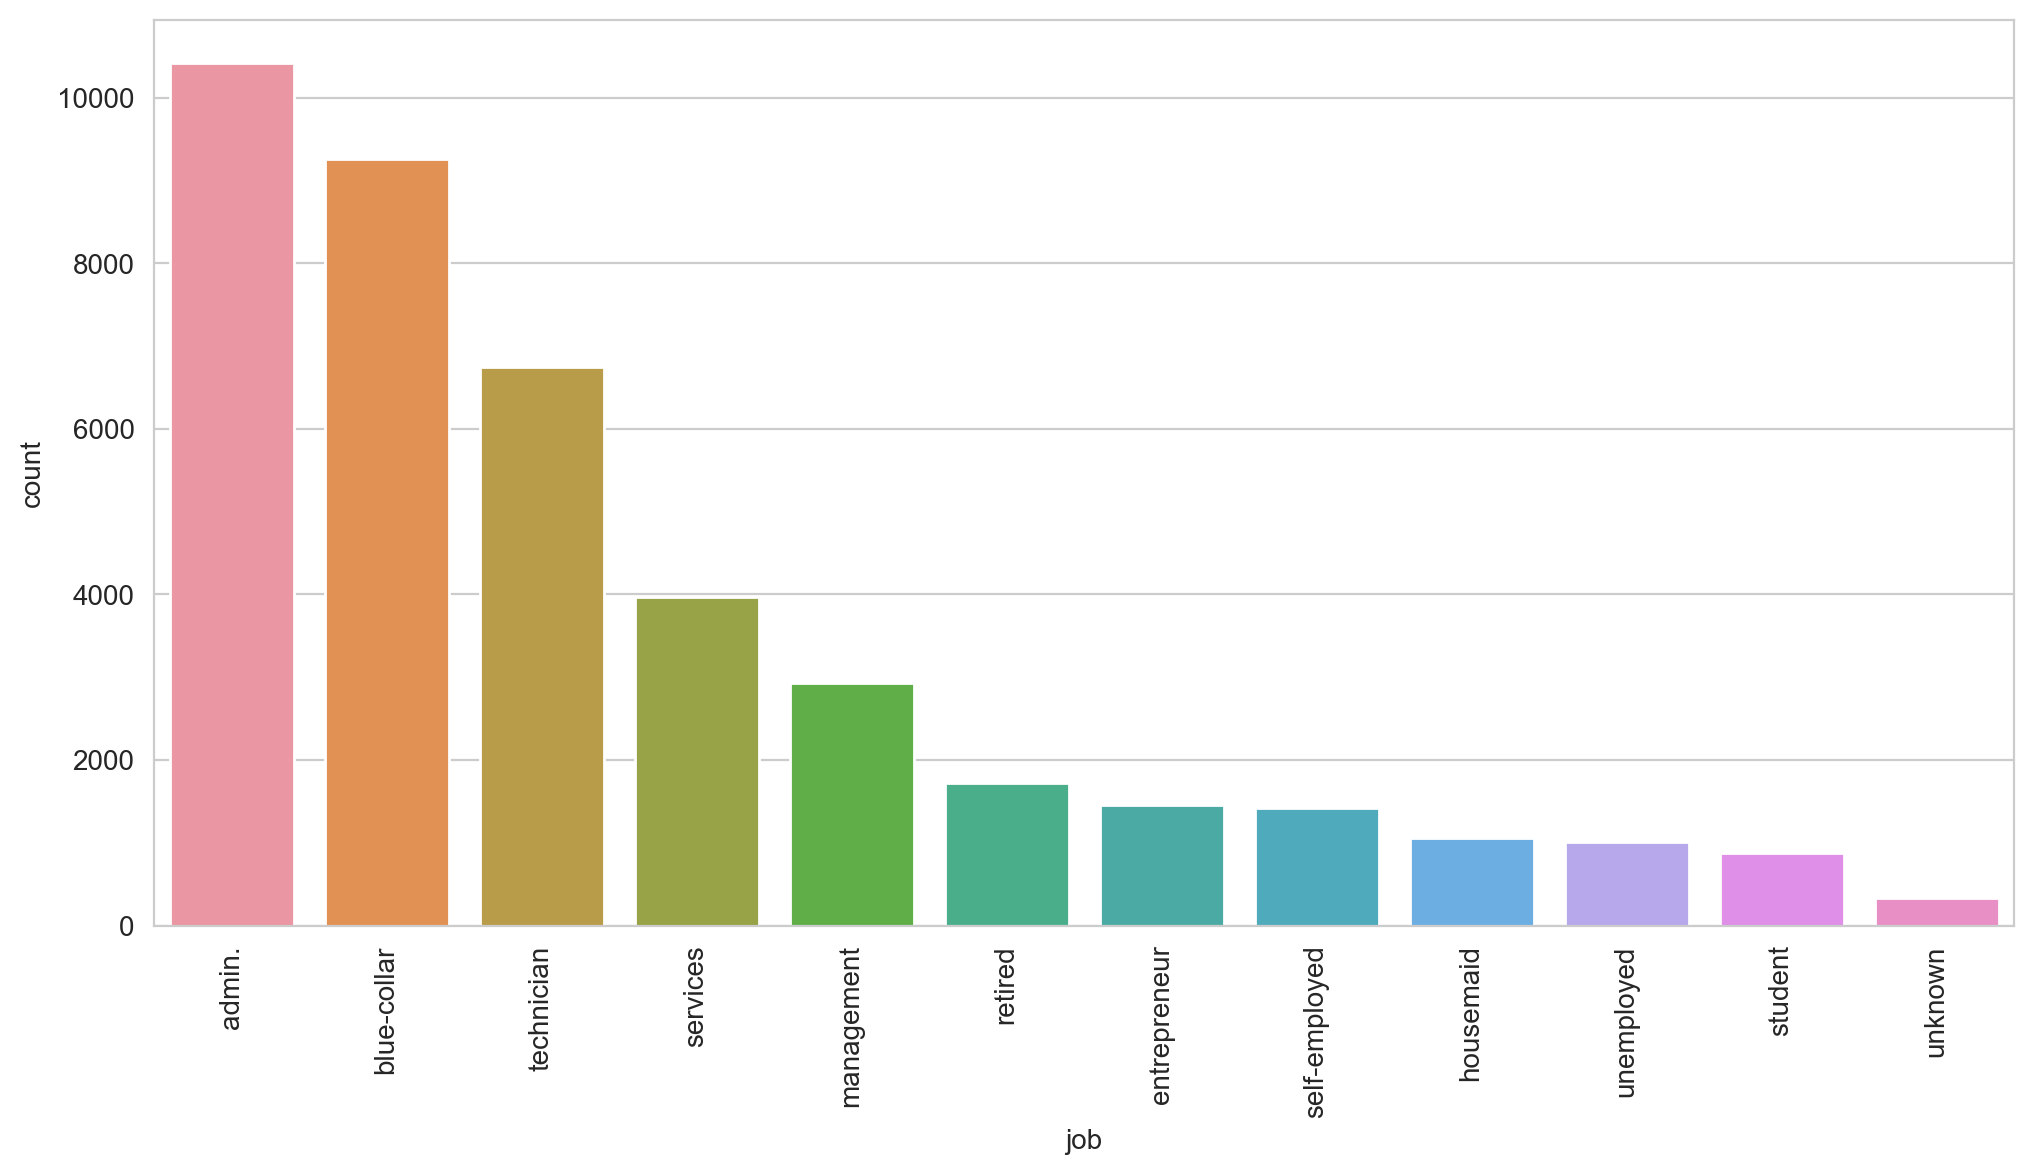

In [32]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='job',order=df['job'].value_counts().index)
plt.xticks(rotation=90);

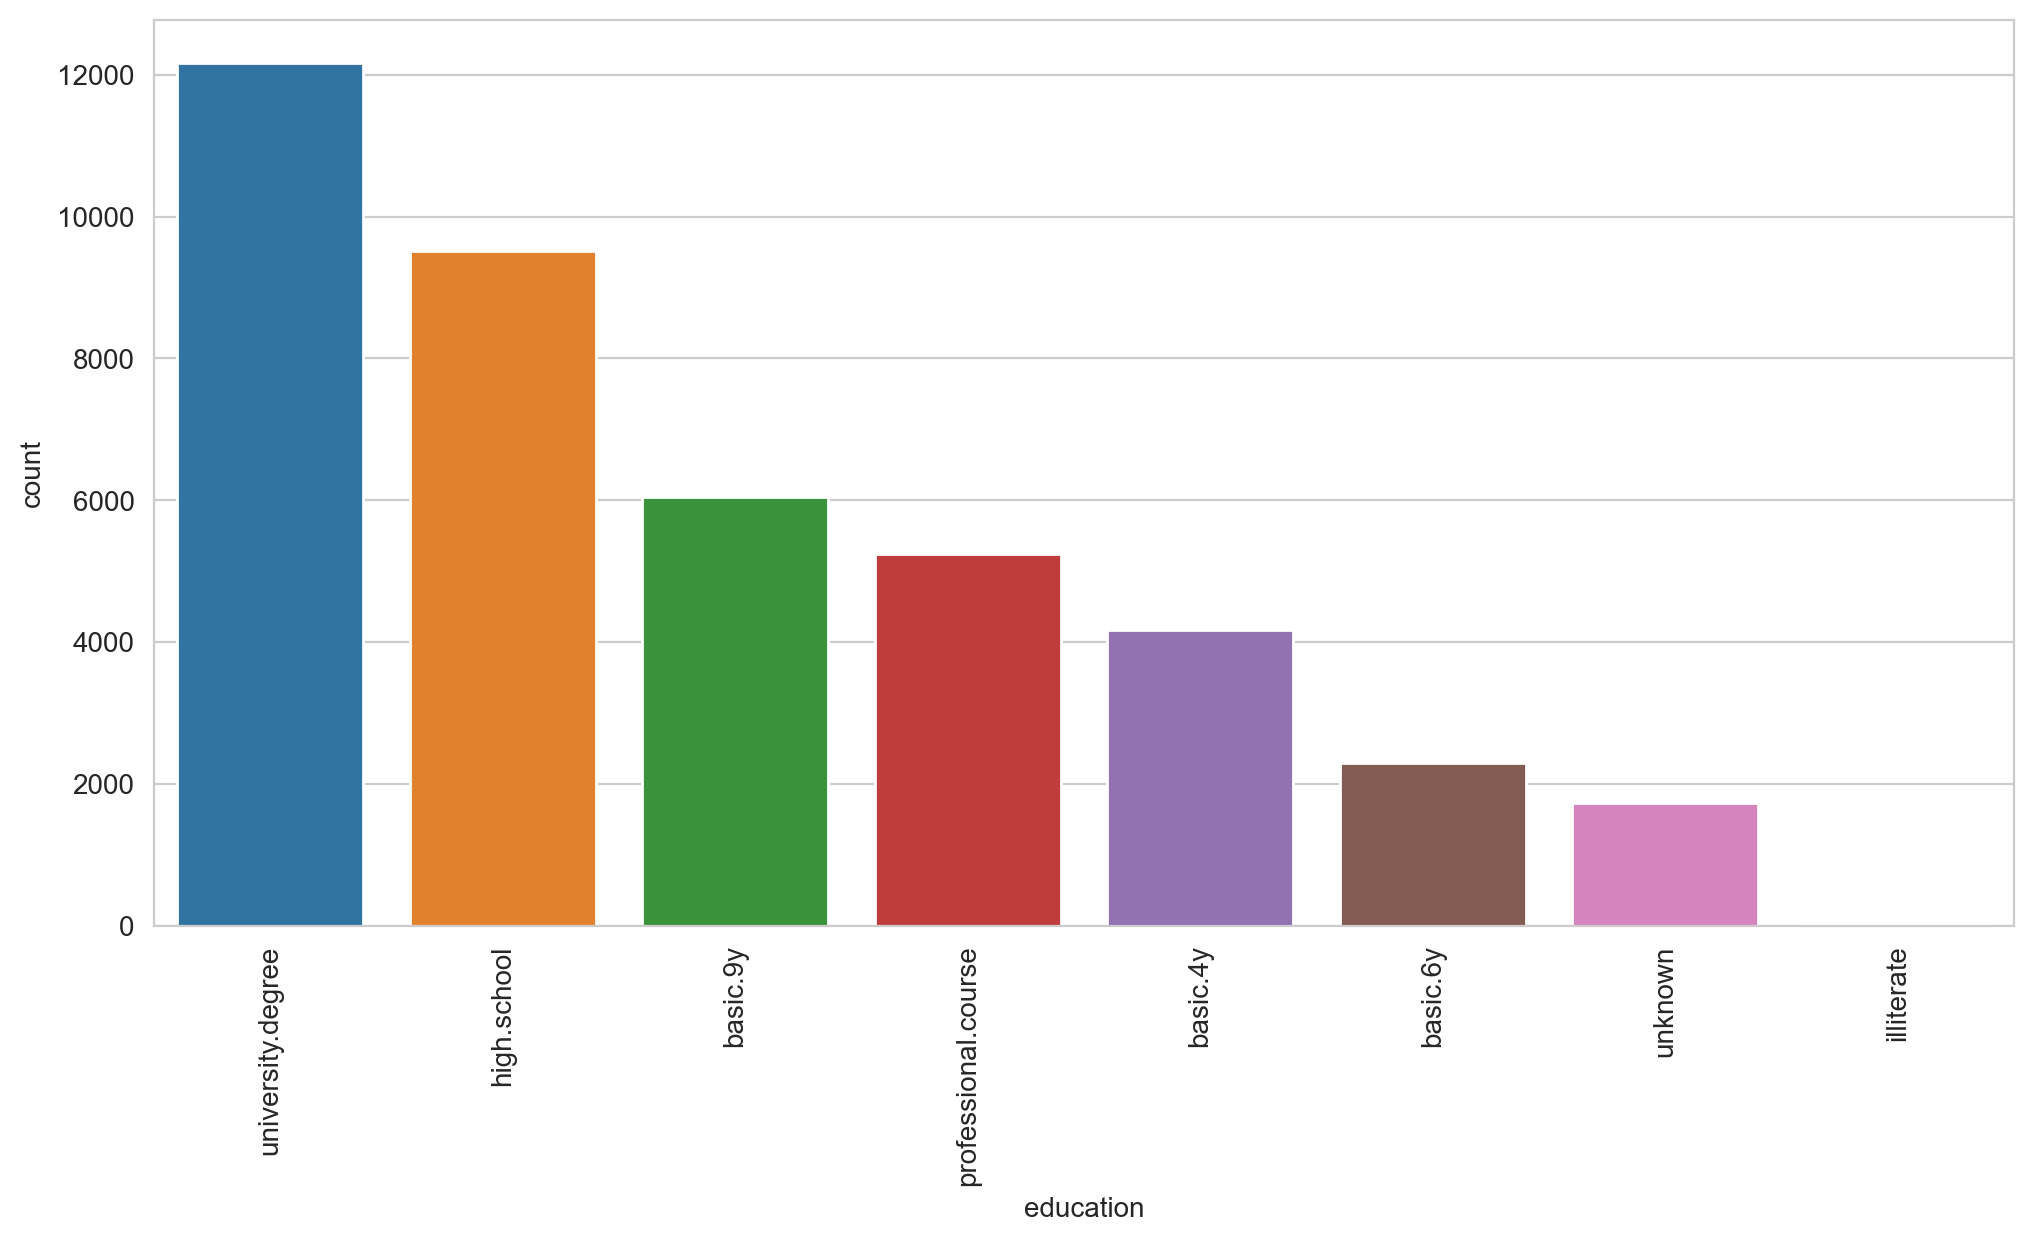

In [33]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index)
plt.xticks(rotation=90);

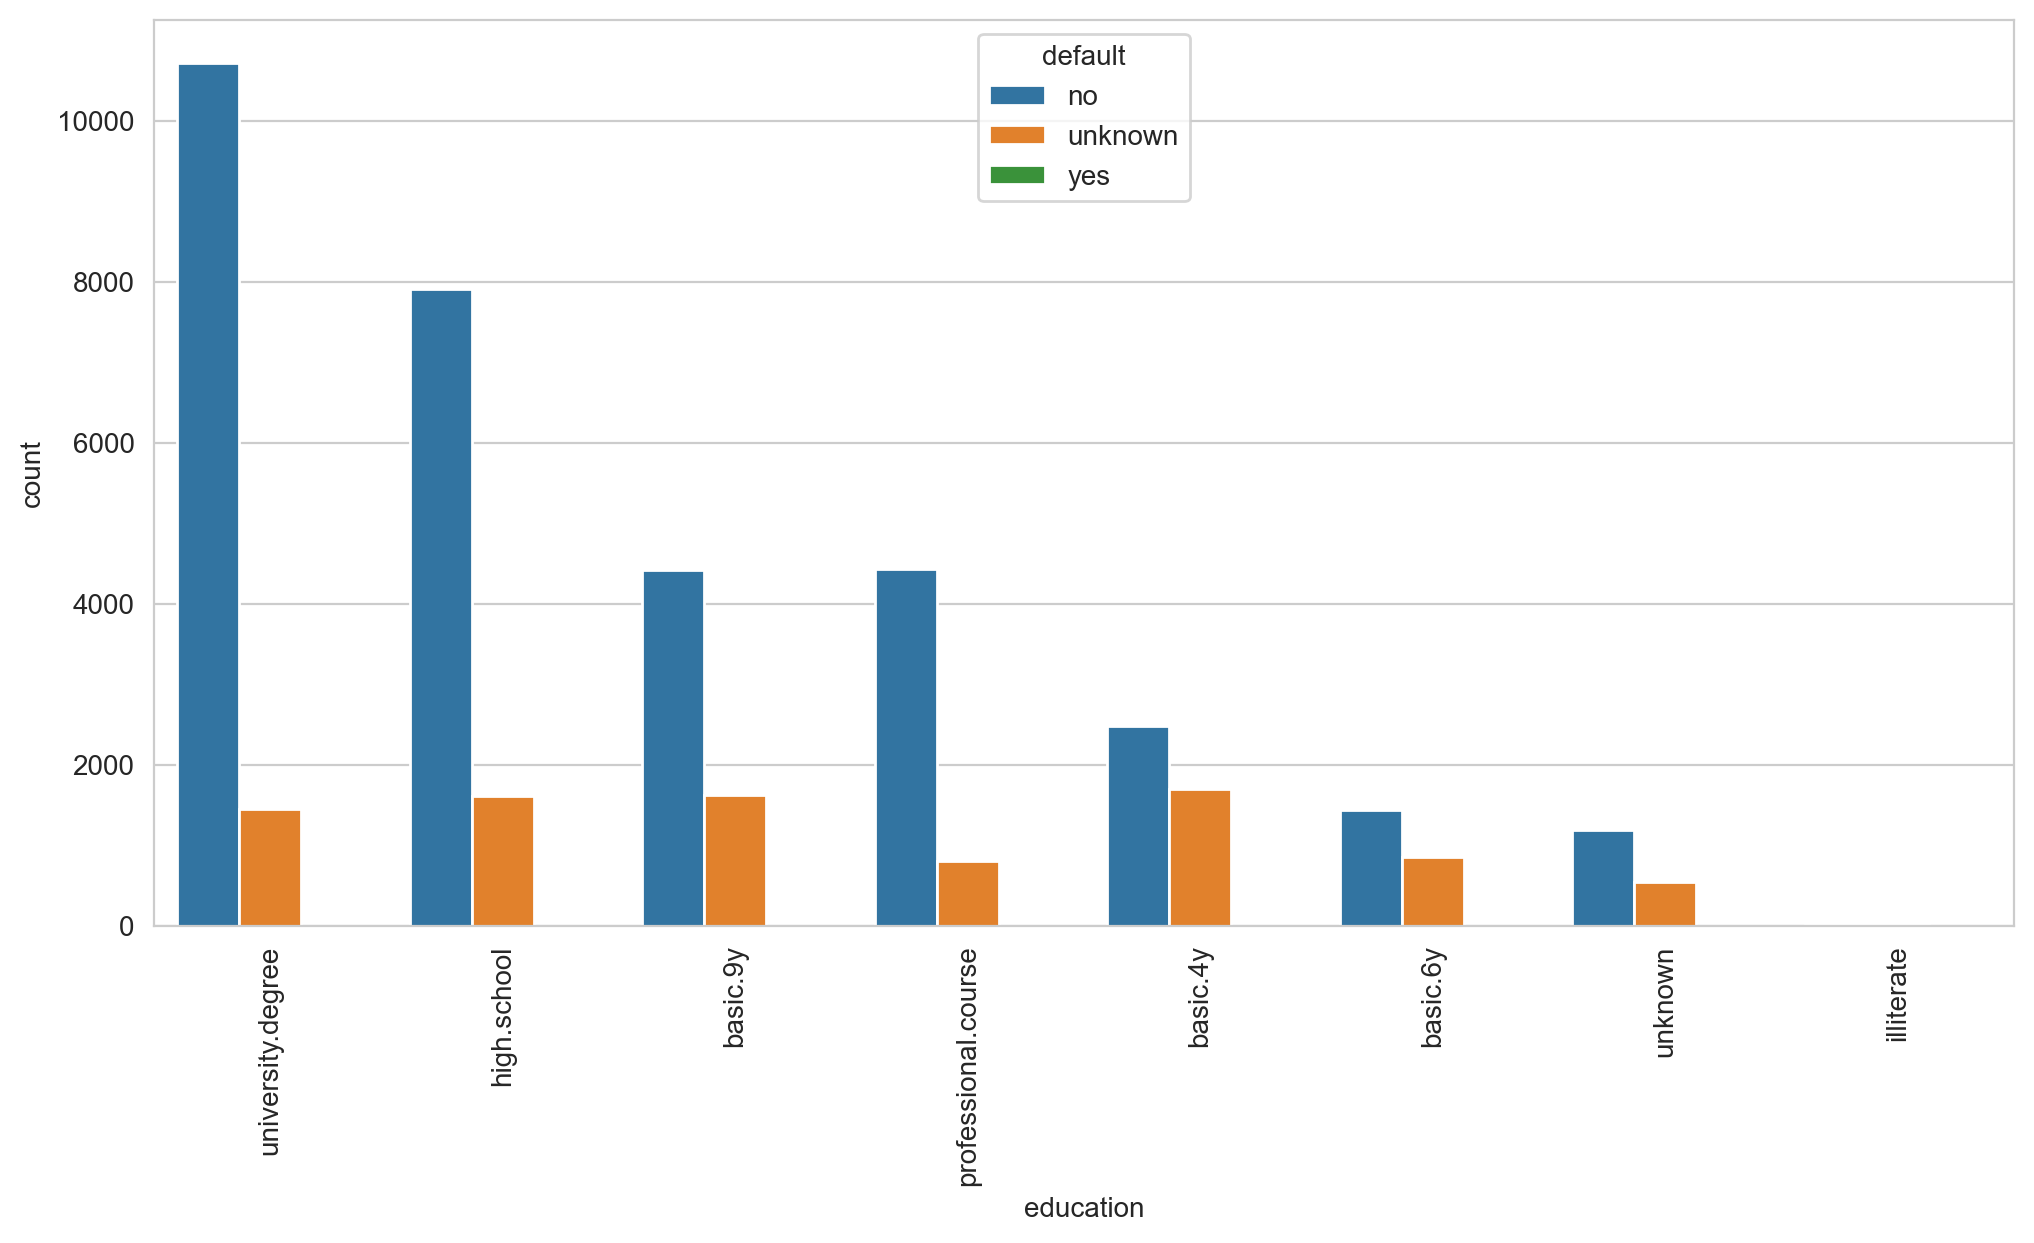

In [34]:
#whether their a relationship btn education and they default a loan?
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='education',order=df['education'].value_counts().index,hue='default')
plt.xticks(rotation=90);

In [35]:
df['loan'].value_counts()
#most people dont had a loan

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

<AxesSubplot:xlabel='previous', ylabel='count'>

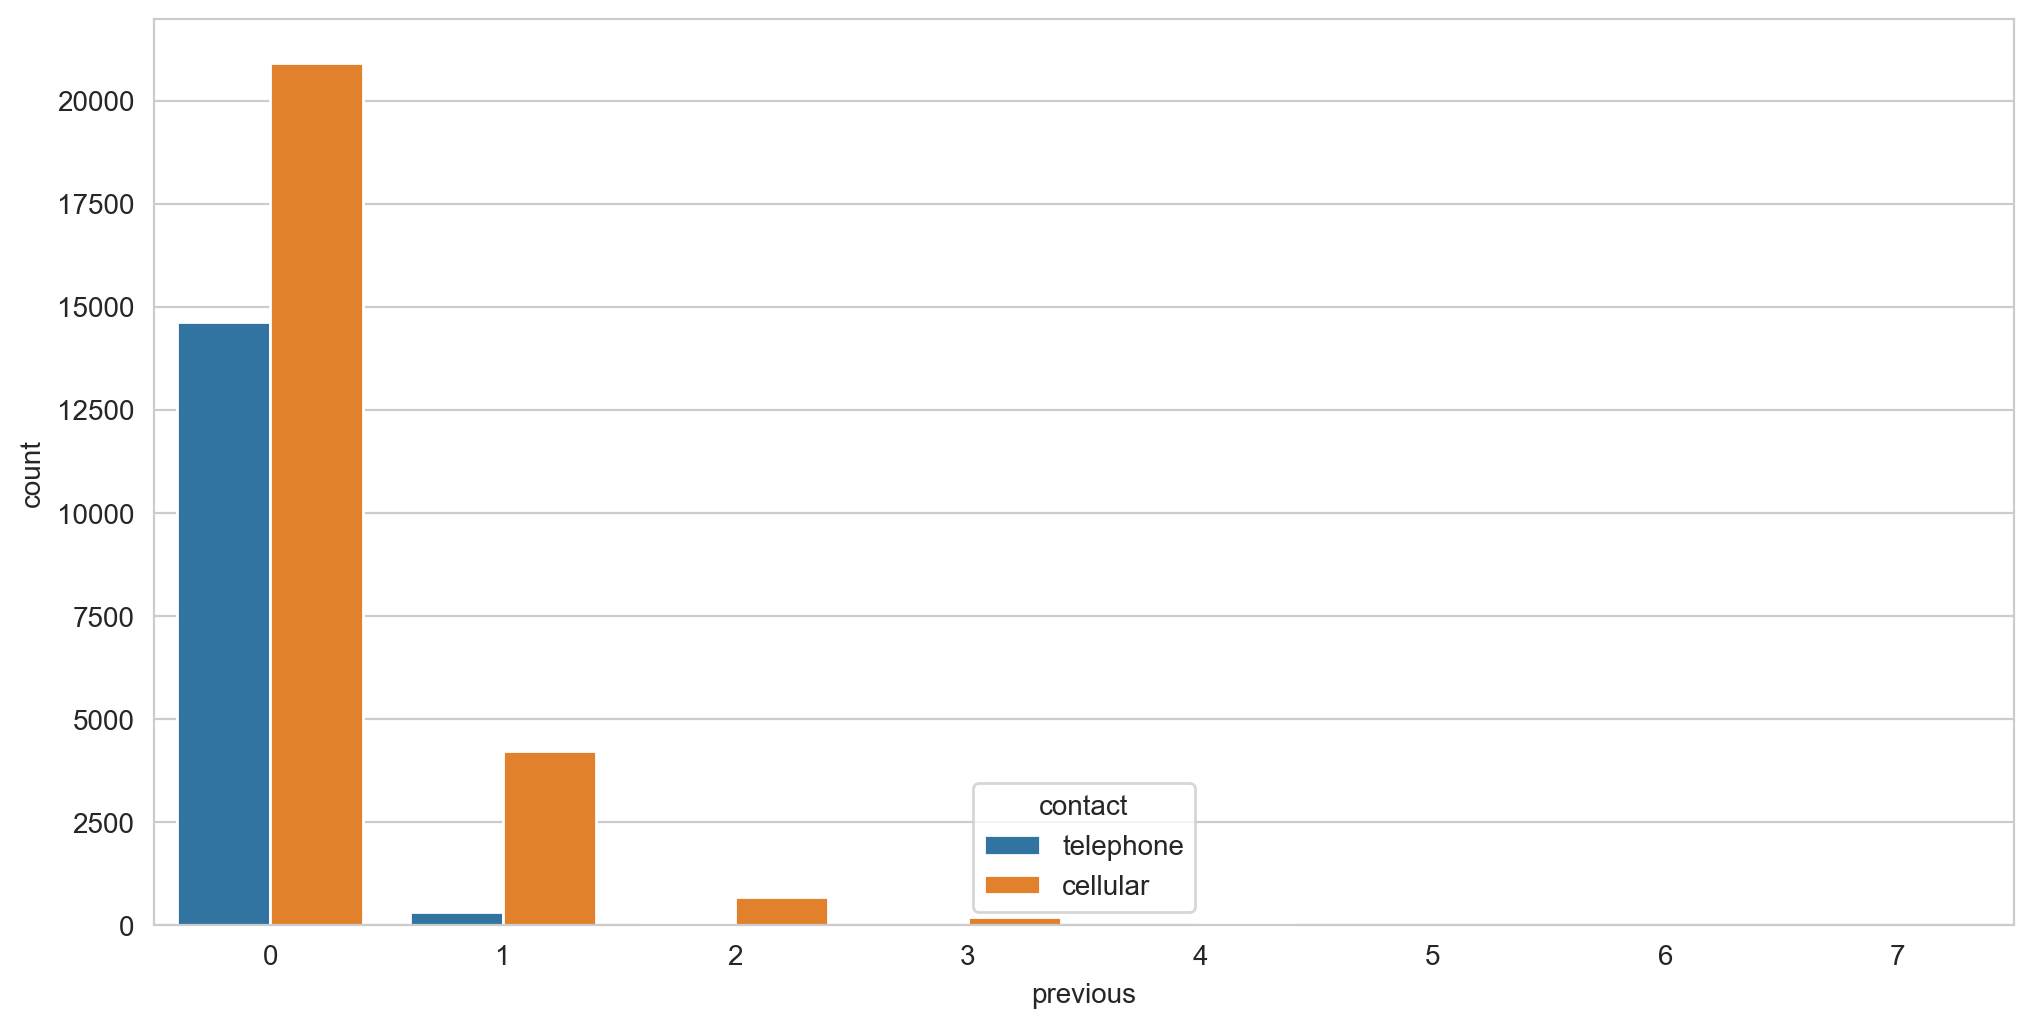

In [36]:
plt.figure(figsize=(12,6),dpi=200)
sns.countplot(data=df,x='previous',hue='contact')

In [37]:
df['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [38]:
df['previous'].value_counts().sum()

41188

In [39]:
41188-4561

36627

## Clustering

### Creating and Fitting a KMeans Model

Note of our method choices here:

* fit(X[, y, sample_weight])
    * Compute k-means clustering.

* fit_predict(X[, y, sample_weight])
    * Compute cluster centers and predict cluster index for each sample.

* fit_transform(X[, y, sample_weight])
    * Compute clustering and transform X to cluster-distance space.

* predict(X[, sample_weight])
    * Predict the closest cluster each sample in X belongs to.

### Data Preparation
## UNSUPERVISED LEARNING REMINDER: NO NEED TO TRAIN TEST SPLIT!! NO LABEL TO "TEST" AGAINST!

## We do however need to transform categorical features into numeric ones where it makes sense to do so, as well as scaling the data due to distance being a key factor in clustering.


In [41]:
X = pd.get_dummies(df)

In [42]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()

In [45]:
scaled_X=scaler.fit_transform(X)

In [47]:
from sklearn.cluster import KMeans

In [48]:
model=KMeans(n_clusters=2)

In [62]:
#fit_predict is same as fit transform
#fit runs the Kmeans and locate whether the clusters centers are and then the 
#predict will map out the X values and check what the cluster centers they are closest to
cluster_labels = model.fit_predict(scaled_X)

In [63]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0])

In [64]:
len(scaled_X)

41188

In [65]:
len(cluster_labels)

41188

<AxesSubplot:>

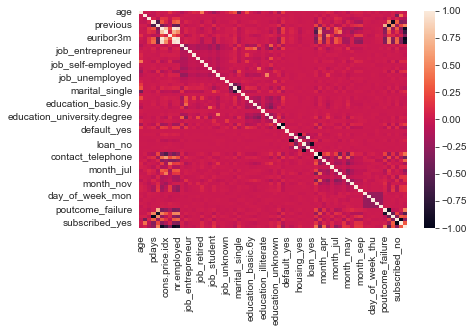

In [66]:
sns.heatmap(X.corr())

In [67]:
X['Cluster']=cluster_labels

In [68]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,1,0,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,0,0,0,1,0,0,1,0


In [69]:
X.corr()['Cluster']

age                     0.019699
duration               -0.039894
campaign                0.129129
pdays                   0.267700
previous               -0.478467
                          ...   
poutcome_nonexistent    0.544377
poutcome_success       -0.254393
subscribed_no           0.294610
subscribed_yes         -0.294610
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

In [70]:
X.corr()['Cluster'].iloc[:-1].sort_values()

previous               -0.478467
poutcome_failure       -0.464295
contact_cellular       -0.410476
month_apr              -0.357923
subscribed_yes         -0.294610
                          ...   
poutcome_nonexistent    0.544377
cons.price.idx          0.679372
nr.employed             0.886155
emp.var.rate            0.932612
euribor3m               0.959297
Name: Cluster, Length: 65, dtype: float64

<AxesSubplot:>

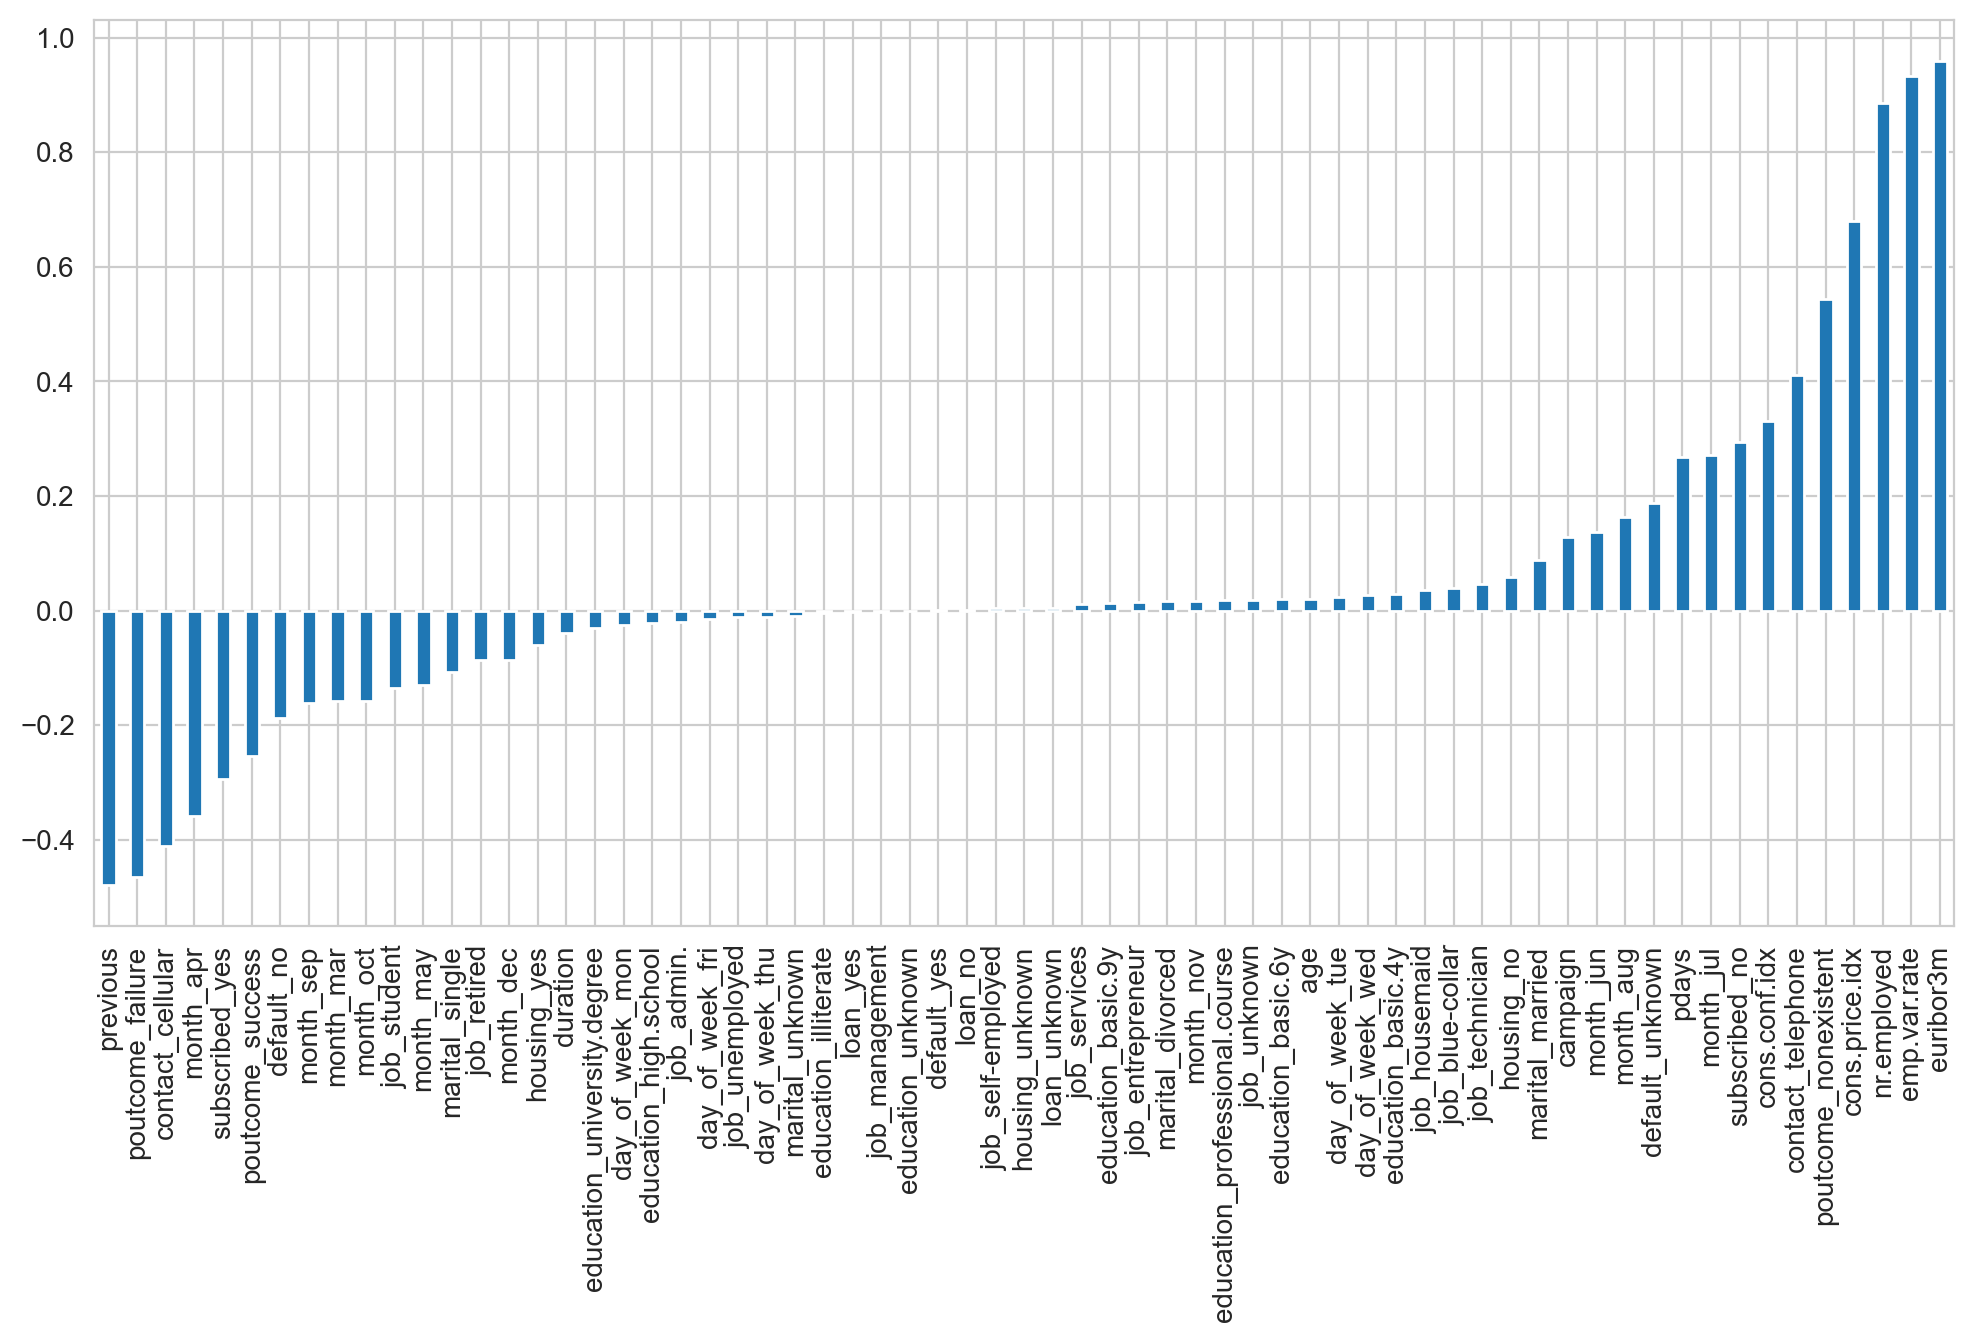

In [71]:
plt.figure(figsize=(12,6),dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')

In [72]:
#this shows what features are important to a particular cluster assignment then 
#you can talk to domain expert to know waht these clusters actually represents

# Choosing K Value

In [73]:
#ssd sum of squared distances from points to cluster center
#we can look for a k value where the rate of reduction in SSD begins to decline

In [74]:
ssd = []

for k in range(2,10):
    
    model = KMeans(n_clusters=k)
    
    
    model.fit(scaled_X)
    
    #Sum of squared distances of samples to their closest cluster center is
    #denoted by model.inertia_.
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

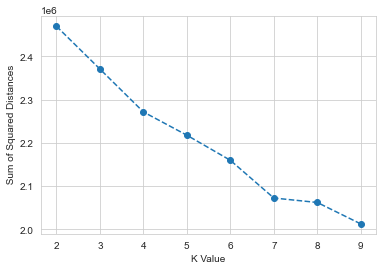

In [75]:
plt.plot(range(2,10),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [76]:
#At k=8 reduction in ssd is very less so it is good choice

## Analyzing SSE Reduction

In [77]:
ssd

[2469792.361662774,
 2370787.0495999013,
 2271502.9049731125,
 2217631.513459307,
 2159599.658769466,
 2072268.19688399,
 2061944.9796755165,
 2012333.549949355]

In [78]:
# Change in SSD from previous K value!
pd.Series(ssd).diff()

0             NaN
1   -99005.312063
2   -99284.144627
3   -53871.391514
4   -58031.854690
5   -87331.461885
6   -10323.217208
7   -49611.429726
dtype: float64

<AxesSubplot:>

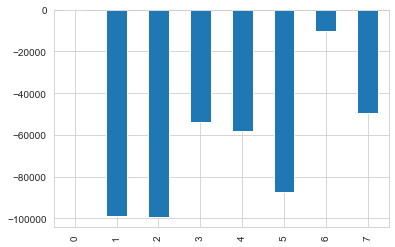

In [79]:
pd.Series(ssd).diff().plot(kind='bar')